# Modelos de Regresón Lineal

## Modelo con datos simulados

Vamos a simular datos para las variables que permiten estimar y.

* _y = a + b * x_
* **x**: 100 valores distribuidos segun normal = 1,5 y desviacion estandar= 2,5
* **Ye** : 4 + 0.2 * x + e ---> y estimada
* **e** estara distribuida segun una normal 0 y desviacion estandar 0.8

In [26]:
import pandas as pd
import numpy as np

In [27]:
x = 1.5 + 2.5 * np.random.randn(100) #randn genera la normal de tamaño 100

In [28]:
res = 0 + 0.8 * np.random.randn(100) #es el error

In [29]:
y_pred = 5 + 1.9 * x #lo que nos devuelve el modelo lineal

In [30]:
y_act =  5 + 1.9 * x + res #los datos que observamos

In [31]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

Ahora vamos a crear el dataset

In [32]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion": y_pred_list
    }
)

In [33]:
data.head()

,x,y_actual,y_prediccion
0,2.513979,9.653923,9.776561
1,2.929363,10.931185,10.565789
2,-0.988926,3.963177,3.121041
3,1.476409,8.918776,7.805176
4,-0.361907,4.214128,4.312377


Vamos a realizar un plot del valor actual que somos capaces de medir y de la prediccion del mismo frente a la variable de entrada

In [34]:
import matplotlib.pyplot as plt

In [35]:
#voy a obtener el promedio de los valores actuales de y
y_mean = [np.mean(y_act) for i in range(1, len(x_list)+ 1)] #un vector que contiene el promedio,tantas veces como tenga x
# para luego mostrar linea de promedios para cada x

Text(0.5, 1.0, 'Valor actual vs prediccion')

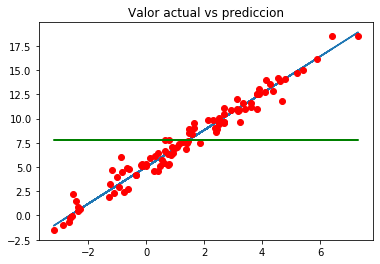

In [36]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor actual vs prediccion")

La linea azul es la prediccion y los rojos son los valores actuales o exactamente los valores de la muestra tomada. La prediccion esta muy cerca y estan bien conseguidos esos valores

![Valores regresion lineal](../Recursos/imgs/regresion_lineal.png)

* **SSD** : Suma de los cuadrados de las diferencias
* **SST** :  Suma de los cuadrados totales
* **SSR** : suma de los cuadrtados de regresion

Todos estos se marcan en diferente color en el grafico y se refeiren a la distancia entre cada uno de los diferentes parametros.
* promedio (linea verde)
* modelo regresion (linea azul)

_Vamos a calcular los anteriores parametrospara ver si nuestro modelo ha sido efectivo_

In [37]:
data["SSR"]=(data["y_prediccion"]-np.mean(y_act))**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-np.mean(y_act))**2

In [38]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,2.513979,9.653923,9.776561,4.115777,0.015040,3.633219
1,2.929363,10.931185,10.565789,7.940934,0.133514,10.133793
2,-0.988926,3.963177,3.121041,21.407108,0.709193,14.323544
3,1.476409,8.918776,7.805176,0.003289,1.240105,1.371132
4,-0.361907,4.214128,4.312377,11.802289,0.009653,12.487003


In [39]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [40]:
SSR

1885.2723854988265

In [41]:
SSD

64.2589537769161

In [42]:
SST

1862.6349427599548

In [43]:
SSR+SSD

1949.5313392757425

In [44]:
R2 = SSR/SST

In [45]:
R2

1.0121534511240988

(array([ 1.,  2.,  4., 11., 22., 24., 21., 11.,  3.,  1.]),
 array([-2.67255232, -2.18880429, -1.70505626, -1.22130822, -0.73756019,
        -0.25381215,  0.22993588,  0.71368392,  1.19743195,  1.68117999,
         2.16492802]),
 <a list of 10 Patch objects>)

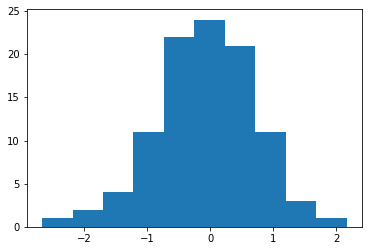

In [46]:
plt.hist(data["y_prediccion"]-data["y_actual"])